<a href="https://colab.research.google.com/github/GabrielTrentino/TCC/blob/master/TCC_parte03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

In [ ]:
data_path = 'https://raw.githubusercontent.com/GabrielTrentino/TCC/master/00%20-%20Dados%20Gerais%20(PIB%2C%20SELIC%2C%20DOLAR)%20-%2000%20-%20Dados%20Gerais%20(PIB%2C%20SELIC%2C%20DOLAR)%20(1).csv'
df = pd.read_csv(data_path)
df.index = pd.to_datetime(df.DateTime, format = "%m/%Y")
df.drop(["DateTime"], inplace = True, axis = 1)
df.head()

,PIB,PIB_POR,PIB_Const,PIB_Const_POR,Ibovespa,Dolar,Selic,Desemprego,IPCA_acu_ano,IPCA_mês,Salario,Consc_Credito_Pjuridica,Consc_Credito_Pfisica,Concs_Total,Cesta_Basica
DateTime,,,,,,,,,,,,,,,
2013-01-01,"2,473",NaN,NaN,NaN,"59761,5","2,037",7.14,7.2,6.15,"0,86",678,110270,124895,235165,"287,94"
2013-02-01,"2,473",NaN,NaN,NaN,"57424,3","1,96",7.12,7.7,6.31,"0,6",678,107509,115171,222680,"286,34"
2013-03-01,"2,473",2.2,"68076,199","1,5","56352,1","1,975",7.12,8.0,6.59,"0,47",678,123133,121230,244363,"287,78"
2013-04-01,"2,473",NaN,NaN,NaN,"55910,4","1,979",7.16,7.8,6.49,"0,55",678,126943,131060,258003,"284,22"
2013-05-01,"2,473",NaN,NaN,NaN,"53506,1","2,023",7.40,7.6,6.50,"0,37",678,138061,131734,269795,"293,96"


In [ ]:
df.PIB = df.PIB.str.replace(',','.').astype(float)
df.PIB_Const = df.PIB_Const.str.replace(',','.').astype(float)
df.PIB_Const_POR = df.PIB_Const_POR.str.replace(',','.').astype(float)
df.Ibovespa = df.Ibovespa.str.replace(',','.').astype(float)
df.Dolar = df.Dolar.str.replace(',','.').astype(float)
df.IPCA_mês = df.IPCA_mês.str.replace(',','.').astype(float)
df.Cesta_Basica = df.Cesta_Basica.str.replace(',','.').astype(float)
df.dtypes

PIB                        float64
PIB_POR                    float64
PIB_Const                  float64
PIB_Const_POR              float64
Ibovespa                   float64
Dolar                      float64
Selic                      float64
Desemprego                 float64
IPCA_acu_ano               float64
IPCA_mês                   float64
Salario                      int64
Consc_Credito_Pjuridica      int64
Consc_Credito_Pfisica        int64
Concs_Total                  int64
Cesta_Basica               float64
dtype: object

In [ ]:
df.interpolate(method='linear', inplace = True)
df.fillna(df[df.index < "2013-06"].mean(), inplace = True)
df.head()

,PIB,PIB_POR,PIB_Const,PIB_Const_POR,Ibovespa,Dolar,Selic,Desemprego,IPCA_acu_ano,IPCA_mês,Salario,Consc_Credito_Pjuridica,Consc_Credito_Pfisica,Concs_Total,Cesta_Basica
DateTime,,,,,,,,,,,,,,,
2013-01-01,2.473,2.433333,69845.314667,2.0,59761.5,2.037,7.14,7.2,6.15,0.86,678,110270,124895,235165,287.94
2013-02-01,2.473,2.433333,69845.314667,2.0,57424.3,1.960,7.12,7.7,6.31,0.60,678,107509,115171,222680,286.34
2013-03-01,2.473,2.200000,68076.199000,1.5,56352.1,1.975,7.12,8.0,6.59,0.47,678,123133,121230,244363,287.78
2013-04-01,2.473,2.433333,69845.314667,2.0,55910.4,1.979,7.16,7.8,6.49,0.55,678,126943,131060,258003,284.22
2013-05-01,2.473,2.666667,71614.430333,2.5,53506.1,2.023,7.40,7.6,6.50,0.37,678,138061,131734,269795,293.96


In [ ]:
metragem_path = 'https://raw.githubusercontent.com/GabrielTrentino/TCC/master/00%20-%20CUSTO%20DA%20METRAGEM%20POR%20TIPO%20DE%20CONSTRU%C3%87%C3%83O%20E%20ACABAMENTO%20-%2000%20-%20CUSTO%20DA%20METRAGEM%20POR%20TIPO%20DE%20CONSTRU%C3%87%C3%83O%20E%20ACABAMENTO.csv'
df_metragem = pd.read_csv(metragem_path)
df_metragem.rename(columns = {"Unnamed: 0":"Datas"}, inplace = True)
df_metragem.index = pd.to_datetime(df_metragem["Datas"], format = "%m/%Y")
df_metragem.drop("Datas", axis = 1, inplace=True)
df_metragem.head(1)

,Tipo,Alto,Normal,Baixo,Mínimo
Datas,,,,,
2013-01-01,Tipo1,NaN,870.37,602.98,521.04


In [ ]:
df_new = pd.DataFrame()
df_new['Tipo1Norm'] = df_metragem.query("Tipo == 'Tipo1'").Normal
df_new['Tipo1Baix'] = df_metragem.query("Tipo == 'Tipo1'").Baixo
df_new['Tipo1Mini'] = df_metragem.query("Tipo == 'Tipo1'").Mínimo
df_new['Tipo2Norm'] = df_metragem.query("Tipo == 'Tipo2'").Normal
df_new['Tipo2Baix'] = df_metragem.query("Tipo == 'Tipo2'").Baixo
df_new['Tipo2Mini'] = df_metragem.query("Tipo == 'Tipo2'").Mínimo
df_new['Tipo3Norm'] = df_metragem.query("Tipo == 'Tipo3'").Normal
df_new['Tipo3Baix'] = df_metragem.query("Tipo == 'Tipo3'").Baixo
df_new['Tipo3Mini'] = df_metragem.query("Tipo == 'Tipo3'").Mínimo
df_new['Tipo4Norm'] = df_metragem.query("Tipo == 'Tipo4'").Normal
df_new['Tipo4Baix'] = df_metragem.query("Tipo == 'Tipo4'").Baixo
df_new['Tipo4Alto'] = df_metragem.query("Tipo == 'Tipo4'").Alto
df_new['Tipo5Norm'] = df_metragem.query("Tipo == 'Tipo5'").Normal
df_new['Tipo5Baix'] = df_metragem.query("Tipo == 'Tipo5'").Baixo
df_new['Tipo5Mini'] = df_metragem.query("Tipo == 'Tipo5'").Mínimo
df_new['Tipo6Norm'] = df_metragem.query("Tipo == 'Tipo6'").Normal
df_new['Tipo6Baix'] = df_metragem.query("Tipo == 'Tipo6'").Baixo
df_new['Tipo6Mini'] = df_metragem.query("Tipo == 'Tipo6'").Mínimo
df_new['Tipo7Norm'] = df_metragem.query("Tipo == 'Tipo7'").Normal
df_new['Tipo7Baix'] = df_metragem.query("Tipo == 'Tipo7'").Baixo
df_new['Tipo7Mini'] = df_metragem.query("Tipo == 'Tipo7'").Mínimo
df_new.head()

,Tipo1Norm,Tipo1Baix,Tipo1Mini,Tipo2Norm,Tipo2Baix,Tipo2Mini,Tipo3Norm,Tipo3Baix,Tipo3Mini,Tipo4Norm,Tipo4Baix,Tipo4Alto,Tipo5Norm,Tipo5Baix,Tipo5Mini,Tipo6Norm,Tipo6Baix,Tipo6Mini,Tipo7Norm,Tipo7Baix,Tipo7Mini
Datas,,,,,,,,,,,,,,,,,,,,,
2013-01-01,870.37,602.98,521.04,978.80,677.45,585.42,974.20,691.48,606.03,829.03,571.12,965.66,1057.24,732.23,637.00,898.10,679.06,604.82,777.92,591.22,523.65
2013-02-01,870.62,604.88,522.83,979.16,679.57,587.40,974.54,693.58,607.96,829.04,572.85,966.19,1057.70,734.44,639.12,898.29,680.33,605.94,778.22,592.35,524.66
2013-03-01,870.31,607.91,525.92,978.74,682.83,590.76,973.66,696.25,610.94,828.13,575.29,970.03,1056.91,737.74,642.73,898.31,682.23,607.91,777.37,593.68,526.26
2013-04-01,874.64,610.41,532.68,983.89,686.07,598.62,978.81,700.02,619.04,832.38,577.69,976.14,1062.74,741.86,651.17,903.33,687.61,615.31,782.43,598.32,533.55
2013-05-01,824.72,575.44,499.21,928.02,646.83,561.19,922.75,659.55,580.28,785.26,544.56,925.62,1002.98,699.59,610.51,849.22,646.01,575.18,739.02,564.45,500.71


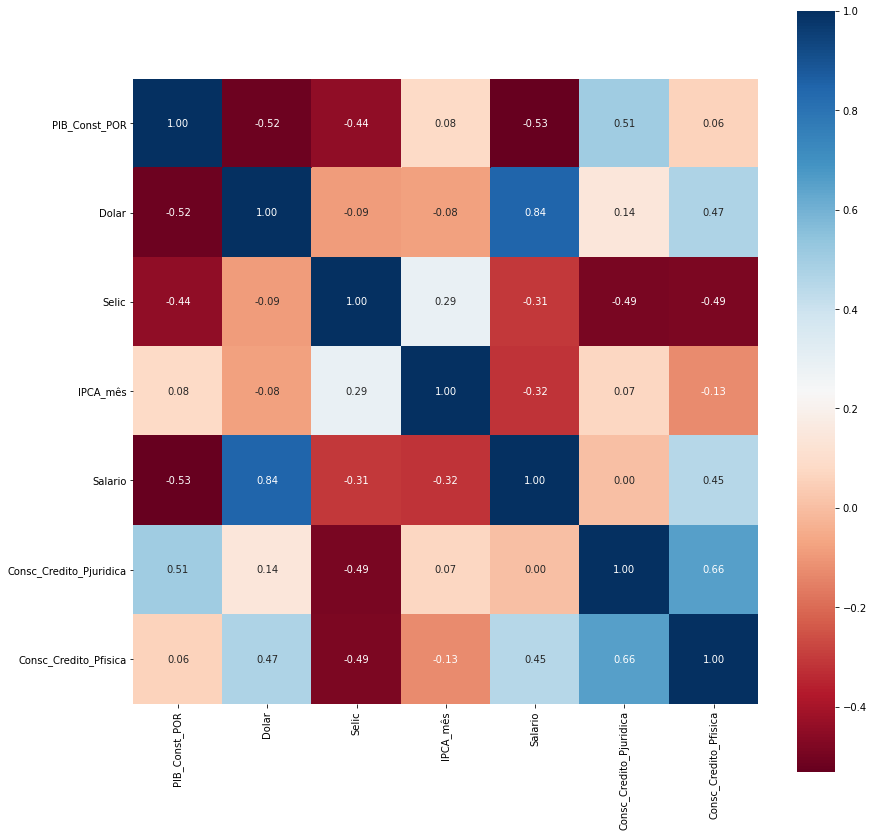

In [ ]:
df_correlacao_total = pd.concat([df, df_new.Tipo1Norm], axis = 1, sort=False)
df_correlacao_total.drop(['Concs_Total', 'PIB_Const', 'PIB_POR', 'Ibovespa', 'IPCA_acu_ano', 'PIB', 'Cesta_Basica', 'Desemprego', 'Tipo1Norm'], axis = 1, inplace = True)
fig, ax = plt.subplots(figsize = (14, 14))

sns.heatmap(df_correlacao_total.corr(), cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [ ]:
df.drop(['Concs_Total', 'PIB_Const_POR', 'PIB_POR', 'IPCA_acu_ano', 'Consc_Credito_Pjuridica'],axis = 1, inplace = True)
df

,PIB,PIB_Const,Ibovespa,Dolar,Selic,Desemprego,IPCA_mês,Salario,Consc_Credito_Pfisica,Cesta_Basica
DateTime,,,,,,,,,,
2013-01-01,2.473,69845.314667,59761.5,2.037,7.14,7.2,0.86,678,124895,287.94
2013-02-01,2.473,69845.314667,57424.3,1.960,7.12,7.7,0.60,678,115171,286.34
2013-03-01,2.473,68076.199000,56352.1,1.975,7.12,8.0,0.47,678,121230,287.78
2013-04-01,2.473,69845.314667,55910.4,1.979,7.16,7.8,0.55,678,131060,284.22
2013-05-01,2.473,71614.430333,53506.1,2.023,7.40,7.6,0.37,678,131734,293.96
...,...,...,...,...,...,...,...,...,...,...
2019-08-01,1.869,59906.992000,101134.6,4.138,6.00,11.8,0.11,998,159893,420.55
2019-09-01,1.869,61202.591000,104745.3,4.164,6.00,11.8,-0.04,998,158811,399.40
2019-10-01,1.869,59975.475333,107219.8,4.004,5.50,11.6,0.10,998,168511,391.31


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train = df_correlacao_total[df_correlacao_total.index < "2019"]
X_test = df_correlacao_total[df_correlacao_total.index >= "2019"]
y_train = df_new[df_new.index < '2019'].Tipo1Norm
y_test = df_new[df_new.index >= '2019'].Tipo1Norm

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print('R² = {:.2f}'.format(metrics.r2_score(y_test, y_pred)))
print('RMSE = {:.2f}'.format(metrics.mean_squared_error(y_test,y_pred, squared = True)))

R² = -0.30
RMSE = 916.10


In [ ]:
pd.DataFrame([y_pred, y_test])

,0,1,2,3,4,5,6,7,8,9,10,11
0,1145.111262,1138.810649,1134.751151,1145.882937,1153.384911,1142.545482,1151.097267,1158.078901,1157.350412,1159.087685,1157.02288,1145.86279
1,1143.060000,1149.690000,1151.590000,1145.710000,1144.440000,1148.520000,1150.120000,1176.110000,1180.370000,1196.200000,1212.82000,1217.45000


#Ignora essa parte de baixo:

In [ ]:
# R = 0
# contador = 0
# valido = 0
# while R < 0.95:
#   contador +=1
#   n = random.randint(1, 10)
#   df_embaralhado = df.sample(n = n, axis = 1)
#   X_train = df_embaralhado[df_embaralhado.index < '2019']
#   X_test = df_embaralhado[df_embaralhado.index >= '2019']

#   y_train = pd.DataFrame(df_new[df_new.index < '2019'].Tipo1Norm)
#   y_test = pd.DataFrame(df_new[df_new.index >= '2019'].Tipo1Norm)

#   modelo = LinearRegression()
#   modelo.fit(X_train, y_train)
#   y_pred = modelo.predict(X_test)
#   R = metrics.r2_score(y_test, y_pred)
#   if R > 0.77:
#     valido += 1
#     print('Valores Válidos {} de {}'. format(valido, contador))
#     print(R)
#     print('RMSE = {}'.format(metrics.mean_squared_error(y_test, y_pred)))
#     lista = list(X_train.columns)
#     lista.sort()
#     print(lista)
#     print(len(list(X_train.columns)), '\n')

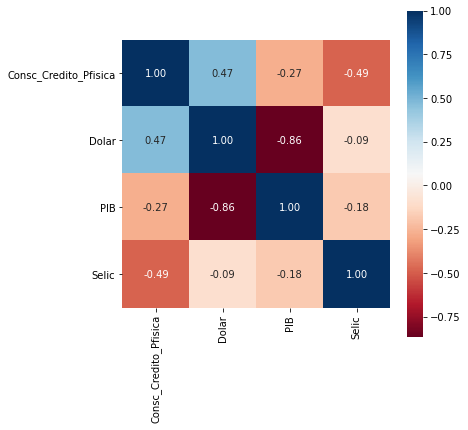

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))

sns.heatmap(df[['Consc_Credito_Pfisica', 'Dolar', 'PIB', 'Selic']].corr(), cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [ ]:
from scipy.stats import ks_2samp

df_melhor = df[['Dolar', 'PIB', 'Selic', 'Consc_Credito_Pfisica']]
X_train = df_melhor[df_melhor.index < '2019']
X_test = df_melhor[df_melhor.index >= '2019']

y_train = pd.DataFrame(df_new[df_new.index < '2019'].Tipo1Norm)
y_test = pd.DataFrame(df_new[df_new.index >= '2019'].Tipo1Norm)

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
R2 = metrics.r2_score(y_test, y_pred)
RMSE = metrics.mean_squared_error(y_test, y_pred, squared = False)
y_pred = np.ravel(y_pred)
KS = ks_2samp(y_pred, y_test.Tipo1Norm)

print('Utilizando Dolar, PIB, Selic e Consc_Credito_Pfisica:')
print('R² = {:.4f}'.format(R2))
print('RMSE = {:.3f}'.format(RMSE))
print('KS = {}'.format(KS))

Utilizando Dolar, PIB, Selic e Consc_Credito_Pfisica:
R² = 0.7728
RMSE = 12.645
KS = Ks_2sampResult(statistic=0.25, pvalue=0.8689816711757754)


In [ ]:
print(((y_test.Tipo1Norm - y_pred)**2).sum())
print(np.mean((y_test.Tipo1Norm - y_pred)**2))
print(np.sqrt(np.mean((y_test.Tipo1Norm - y_pred)**2)))

1918.7269310324796
159.8939109193733
12.644916406183684


In [ ]:
Valores Válidos 76 de 1309
0.7728186353136264
RMSE = 159.8939109210721
['Consc_Credito_Pfisica', 'Dolar', 'PIB', 'Selic']
4 